# Water Potability 🐳🐳🐋🐋

## Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

>1. `pH value:`  
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. `Hardness:`  
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

>3. `Solids (Total dissolved solids - TDS):`
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. `Chloramines:`
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

>5. `Sulfate:`
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. `Conductivity:`
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

>7. `Organic_carbon:`
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. `Trihalomethanes:`
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

>9. `Turbidity:`
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. `Potability:`
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

### 1. Problem Definition
In a statement,

> Given the Feature-set can we predict that the water is safe to drink??

# Pre-requisite

In [26]:
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Train_test_Split
from sklearn.model_selection import train_test_split

#model - scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Data Loading

In [5]:
df=pd.read_csv('water_potability.csv')
df.rename(columns = {'Sulfate':'Sulphate'} , inplace=True)

In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


## Data Exploration

In [8]:
df.shape

(3276, 10)

In [9]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

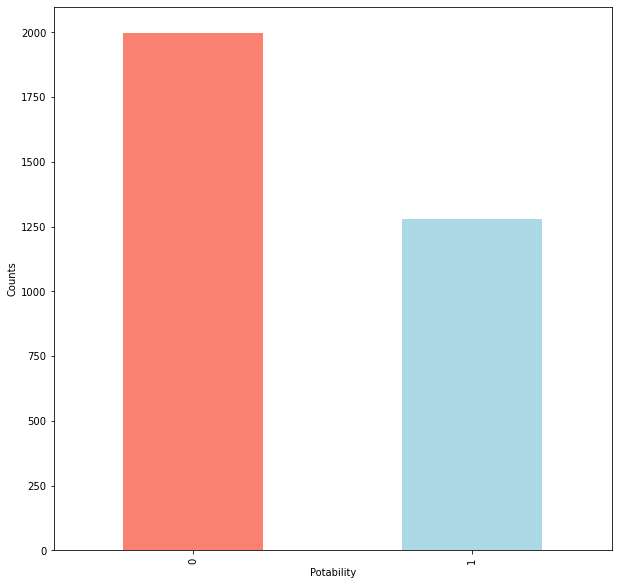

In [10]:
plt.figure(figsize=(10,10))
df.Potability.value_counts().plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('Potability')
plt.ylabel('Counts');
#plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulphate         2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Text(0, 0.5, 'Frequency')

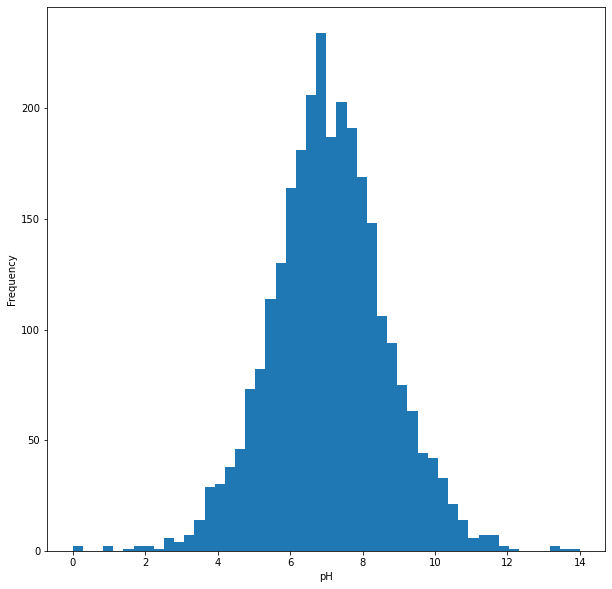

In [13]:
plt.figure(figsize=(10,10))
plt.hist(df.ph,bins=50);
plt.xlabel('pH')
plt.ylabel('Frequency')

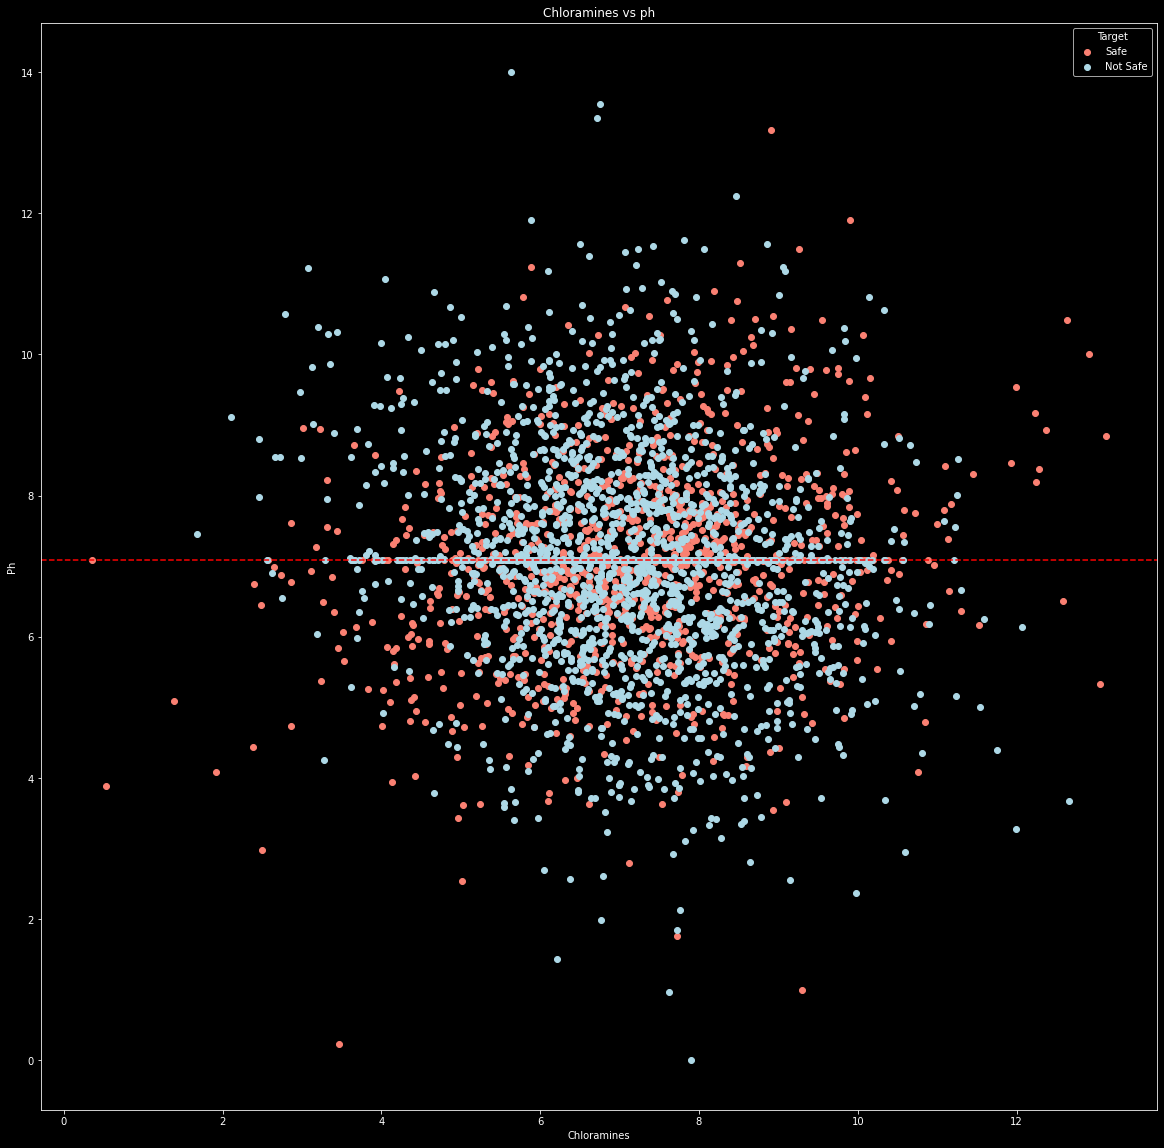

In [31]:
plt.style.use('dark_background')
fig,ax=plt.subplots(figsize=(20,20))
plt.scatter(x=df.Chloramines[df.Potability==1],y=df.ph[df.Potability==1],color='salmon',label='Safe')
plt.scatter(x=df.Chloramines[df.Potability==0],y=df.ph[df.Potability==0],color='lightblue',label='Not Safe')
plt.title('Chloramines vs ph')
plt.ylabel('Ph')
plt.xlabel('Chloramines')
plt.legend(title='Target')
plt.axhline(df.ph.mean(),linestyle='--',color='red');

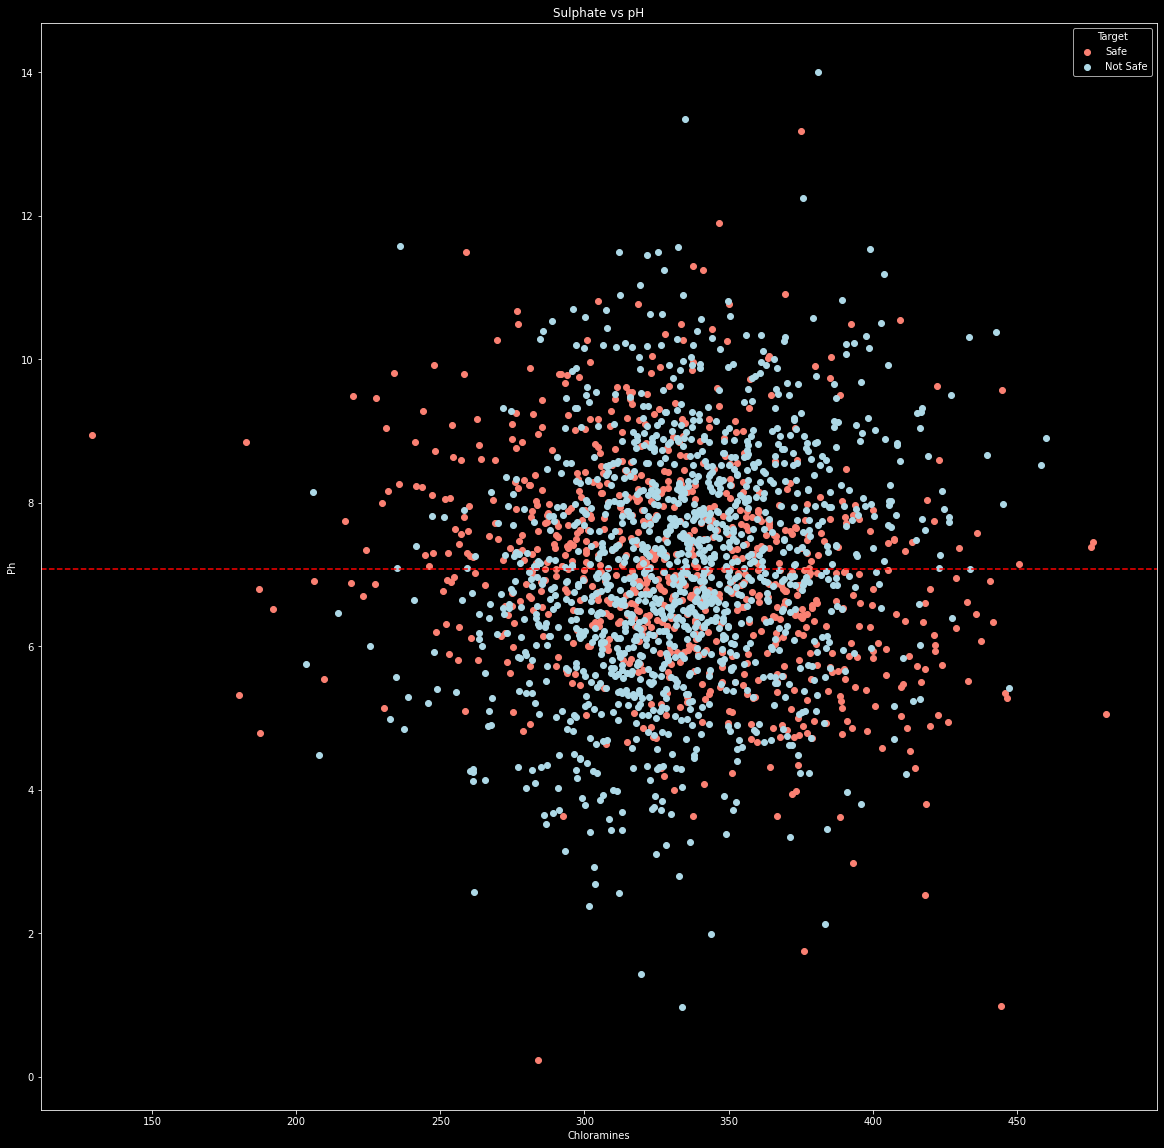

In [15]:
fig,ax=plt.subplots(figsize=(20,20))
plt.scatter(x=df.Sulphate[df.Potability==1],y=df.ph[df.Potability==1],color='salmon',label='Safe')
plt.scatter(x=df.Sulphate[df.Potability==0],y=df.ph[df.Potability==0],color='lightblue',label='Not Safe')
plt.title('Sulphate vs pH')
plt.ylabel('Ph')
plt.xlabel('Chloramines')
plt.legend(title='Target')
plt.axhline(df.ph.mean(),linestyle='--',color='red');

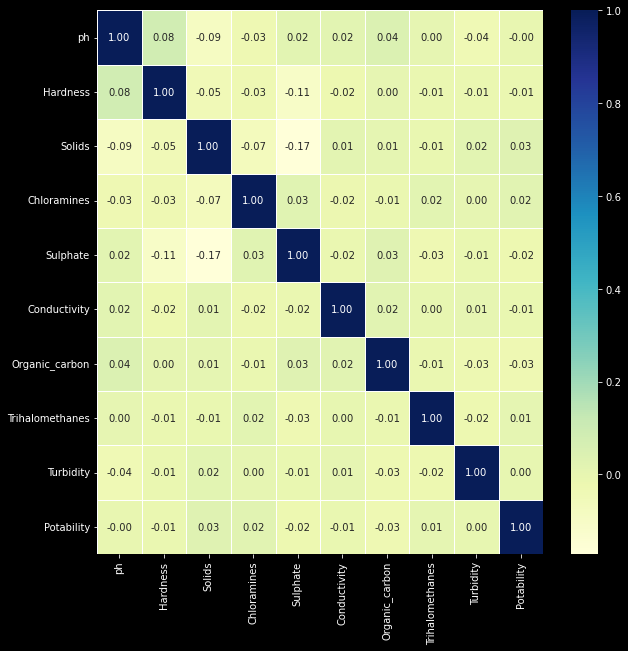

In [16]:
correlation=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(correlation,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

## Data Pre-Processing

In [17]:
#shows the number of null values in the data frame
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulphate           781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
# filling the ph values with their mean
df.ph.fillna(df.ph.mean(),inplace=True)

In [19]:
# filling the Sulphate values with their mean
df.Sulphate.fillna(df.Sulphate.mean(),inplace=True)

In [20]:
# filling the Trihalomethanes with their mean
df.Trihalomethanes.fillna(df.Trihalomethanes.mean(),inplace=True)

In [21]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulphate           0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Modelling

In [22]:
# Features
x=df.drop('Potability',axis=1)
# Label
y=df.Potability

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
models={'KNeighborsClassifier':KNeighborsClassifier(),
       'LogisticRegression':LogisticRegression(),
       'RandomForestClassifier':RandomForestClassifier()}
result=dict()


In [25]:
for model_n,model in models.items():
    print(f'{model_n}:')
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)*100
    result[model_n]=score
    print(f'score = {score}')

KNeighborsClassifier:
score = 57.3170731707317
LogisticRegression:
score = 59.45121951219512
RandomForestClassifier:
score = 67.07317073170732


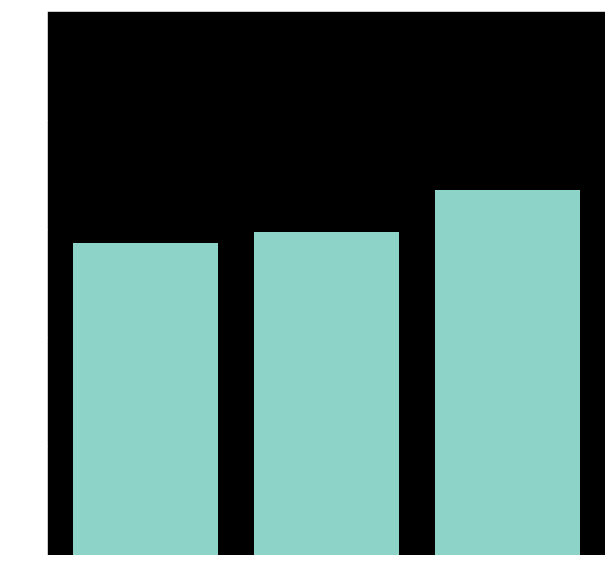

In [30]:
plt.figure(figsize=(10,10))
plt.bar(result.keys(),result.values())
plt.ylabel('Score')
plt.ylim([0,100]);

## HyperParameter Tuning
#### we will be using `RandomForestClassifier` for hyperparameter tuning as it gives the maximum score to us

In [111]:
model=RandomForestClassifier()

In [105]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

`The parameters to be tuned`

In [95]:
train_score=[]
test_score=[]


# neighbors
neighbors = range(10,100)

# loop through different values of neighbors
for i in neighbors:
    model.set_params(n_estimators=i)
    model.fit(x_train,y_train)
    print((i),model.score(x_test,y_test))
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))

10 0.635670731707317
11 0.6265243902439024
12 0.6539634146341463
13 0.6402439024390244
14 0.6676829268292683
15 0.6539634146341463
16 0.6387195121951219
17 0.6600609756097561
18 0.6371951219512195
19 0.6661585365853658
20 0.6554878048780488
21 0.663109756097561
22 0.6600609756097561
23 0.6463414634146342
24 0.6707317073170732
25 0.6615853658536586
26 0.6585365853658537
27 0.676829268292683
28 0.6539634146341463
29 0.6615853658536586
30 0.6646341463414634
31 0.6646341463414634
32 0.6615853658536586
33 0.6646341463414634
34 0.6661585365853658
35 0.6661585365853658
36 0.6783536585365854
37 0.6646341463414634
38 0.6829268292682927
39 0.6585365853658537
40 0.676829268292683
41 0.6570121951219512
42 0.6737804878048781
43 0.6509146341463414
44 0.676829268292683
45 0.6600609756097561
46 0.6951219512195121
47 0.6554878048780488
48 0.6661585365853658
49 0.6737804878048781
50 0.6554878048780488
51 0.6737804878048781
52 0.6600609756097561
53 0.6615853658536586
54 0.6554878048780488
55 0.6692073170

In [96]:
train_score

[0.9809160305343512,
 0.9900763358778626,
 0.9889312977099237,
 0.9919847328244275,
 0.9919847328244275,
 0.9942748091603053,
 0.9935114503816794,
 0.9984732824427481,
 0.998854961832061,
 0.999236641221374,
 0.9977099236641221,
 0.9977099236641221,
 0.999236641221374,
 0.999618320610687,
 0.9973282442748092,
 0.999618320610687,
 0.9973282442748092,
 0.998854961832061,
 0.999236641221374,
 0.999236641221374,
 0.999618320610687,
 0.999618320610687,
 0.999618320610687,
 0.999618320610687,
 0.999618320610687,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999236641221374,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999618320610687,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999618320610687,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [97]:
test_score

[0.635670731707317,
 0.6265243902439024,
 0.6539634146341463,
 0.6402439024390244,
 0.6676829268292683,
 0.6539634146341463,
 0.6387195121951219,
 0.6600609756097561,
 0.6371951219512195,
 0.6661585365853658,
 0.6554878048780488,
 0.663109756097561,
 0.6600609756097561,
 0.6463414634146342,
 0.6707317073170732,
 0.6615853658536586,
 0.6585365853658537,
 0.676829268292683,
 0.6539634146341463,
 0.6615853658536586,
 0.6646341463414634,
 0.6646341463414634,
 0.6615853658536586,
 0.6646341463414634,
 0.6661585365853658,
 0.6661585365853658,
 0.6783536585365854,
 0.6646341463414634,
 0.6829268292682927,
 0.6585365853658537,
 0.676829268292683,
 0.6570121951219512,
 0.6737804878048781,
 0.6509146341463414,
 0.676829268292683,
 0.6600609756097561,
 0.6951219512195121,
 0.6554878048780488,
 0.6661585365853658,
 0.6737804878048781,
 0.6554878048780488,
 0.6737804878048781,
 0.6600609756097561,
 0.6615853658536586,
 0.6554878048780488,
 0.6692073170731707,
 0.6798780487804879,
 0.679878048780487

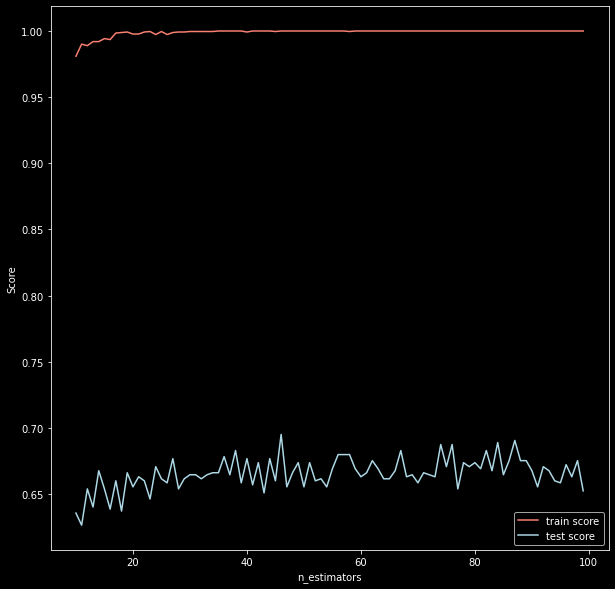

In [98]:
plt.figure(figsize=(10,10))
plt.plot(neighbors,train_score,color='salmon',label='train score')
plt.plot(neighbors,test_score,color='lightblue',label='test score')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Score');

In [99]:
ran_grid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
model=RandomForestClassifier()

In [122]:
gs=GridSearchCV(estimator=model,param_grid=ran_grid,n_jobs=8,verbose=3)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=3)

In [123]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 310}

In [124]:
gs.score(x_test,y_test)

0.6722560975609756

In [134]:
model=RandomForestClassifier(n_estimators=210,min_samples_split=4,min_samples_leaf=5)
model.fit(x,y)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=4,
                       n_estimators=210)

In [135]:
model.score(x_test,y_test)

0.9588414634146342

# Evaluation of our tuned model

C:\Users\Sahil Jain\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


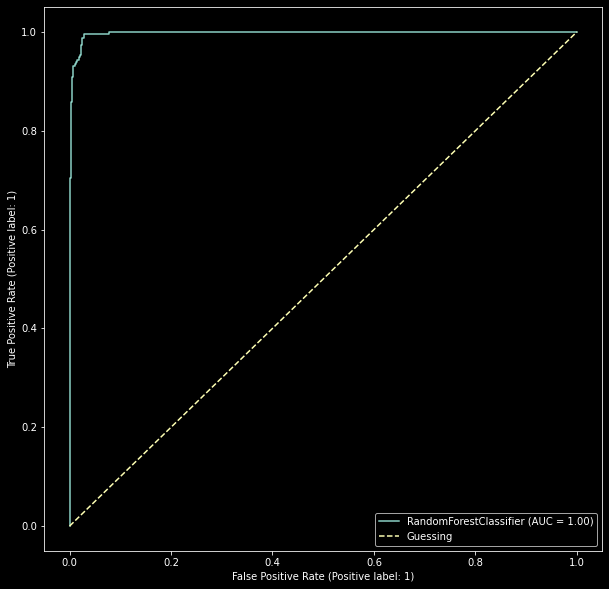

In [136]:
fig,ax=plt.subplots(figsize=(10,10))
plot_roc_curve(estimator=model,X=x_test,y=y_test,ax=ax)
plt.plot([0,1],[0,1],linestyle='--',label='Guessing')
plt.legend()

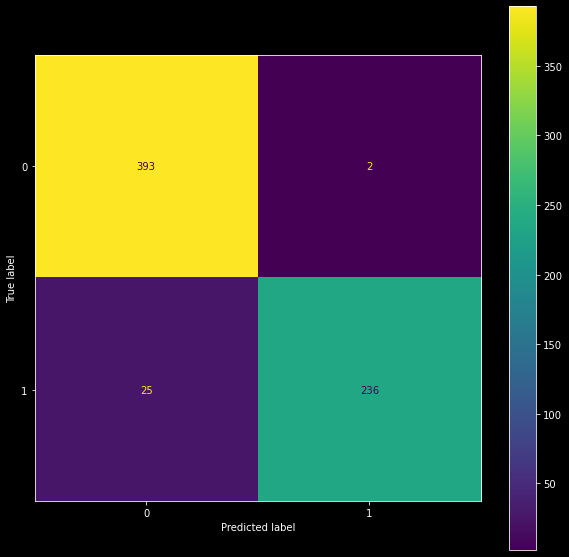

In [137]:
fig,ax=plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=model,X=x_test,y=y_test,ax=ax,)


In [138]:
y_pred=model.predict(x_test)

In [139]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       395
           1       0.99      0.90      0.95       261

    accuracy                           0.96       656
   macro avg       0.97      0.95      0.96       656
weighted avg       0.96      0.96      0.96       656



## Feature Importance

In [140]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 310}

In [141]:
# Function for front End
def predict_potability(ph,hard,sol,chlor,sul,cond,org,tri,tur):
    ph=pd.Series([ph])
    hard=pd.Series([hard])
    sol=pd.Series([sol])
    chlor=pd.Series([chlor])
    sul=pd.Series([sul])
    cond=pd.Series([cond])
    org=pd.Series([org])
    tri=pd.Series([tri])
    tur=pd.Series([tur])
    data=pd.DataFrame({'ph':ph,'Hardness':hard,'Solids':sol,'Chloramines':chlor,'Sulphate':sul,'Conductivity':cond,'Organic_carbon':org,'Trihalomethanes':tri,'Turbidity':tur})
    y_pred=gs.predict(data)
    return y_pred

In [142]:
print(predict_potability(23,23,23,23,23,23,23,23,23)[0])

1


In [131]:
import pickle
pickle.dump(rsf,open('Thepredictor.pkl','wb'))

In [ ]:
rsf.